# Logistic Regression 

## import library

In [490]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load training data

In [491]:
fname_data = 'assignment_08_data.csv'

data = np.genfromtxt(fname_data, delimiter=',')
num_data = data.shape[0]

point_x = np.zeros(num_data)
point_y = np.zeros(num_data)
label   = np.zeros(num_data)

for i in range(num_data):

    point_x[i]  = data[i,0]
    point_y[i]  = data[i,1]
    label[i]    = data[i,2]


## define linear regression function with inputs $\theta = (\theta_0, \theta_1, \theta_2)$ and ${\rm point} = (1, x, y)$

In [492]:
def linear_regression(theta,x,y):
    value = theta[0]+theta[1]*x+theta[2]*y
    return value

## define sigmoid function with input $x$

In [493]:
def sigmoid(x):
    z = 1/(1+np.exp((-1)*x))
    return z

## define loss function for the logistic regression

In [494]:
def compute_loss(theta, x, y):
    Loss = 0
    for i in range(num_data):
        f = linear_regression(theta,x[i],y[i])
        h = sigmoid(f)
        Loss = Loss + label[i]*np.log(h)+(1-label[i])*np.log((1-h))
    
    Loss = Loss/num_data*(-1)
    return Loss

## define gradient vector for the model parameters $\theta = (\theta_0, \theta_1, \theta_2)$

In [495]:
def compute_gradient(theta, x, y):
    
    gradient = np.array((0, 0, 0))
    
    for i in range(num_data) :
        f = linear_regression(theta,x[i],y[i])
        h = sigmoid(f)-label[i]
        gradient = gradient + h*np.array((1, x[i], y[i]))
    
    gradient = gradient/num_data
    
    return gradient

## gradient descent for the model parameters $\theta = (\theta_0, \theta_1, \theta_2)$

In [496]:
num_iteration   = 5000  # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.001 # USE THIS VALUE for the learning rate
theta           = np.array((0, 0, 0))   # USE THIS VALUE for the initial condition of the model parameters
theta_iteration = np.zeros((num_iteration, theta.size))
loss_iteration  = np.zeros(num_iteration) 


## iterations for the gradient descent

In [497]:
for i in range(num_iteration):
    theta = theta - learning_rate*compute_gradient(theta,point_x,point_y)
    loss = compute_loss(theta,point_x,point_y)
    theta_iteration[i] = theta
    loss_iteration[i] = loss
    
    print(i,theta, loss)
    


0 [ 0.          0.00353072 -0.00360356] 0.6681252553122177
1 [ 1.15663905e-07  6.94344738e-03 -7.08429770e-03] 0.6447631857061351
2 [ 3.32816218e-07  1.02424299e-02 -1.04468031e-02] 0.622945105606487
3 [ 6.33118220e-07  1.34320307e-02 -1.36958331e-02] 0.6025598003705974
4 [ 9.95483105e-07  1.65166539e-02 -1.68362256e-02] 0.5835015476745606
5 [ 1.39729447e-06  1.95006934e-02 -1.98728268e-02] 0.5656706577103825
6 [ 1.81541115e-06  2.23884897e-02 -2.28104323e-02] 0.5489737609875218
7 [ 2.22696136e-06  2.51842943e-02 -2.56537395e-02] 0.5333238929199206
8 [ 2.60994210e-06  2.78922433e-02 -2.84073117e-02] 0.5186404214727494
9 [ 2.94364768e-06  3.05163373e-02 -3.10755517e-02] 0.5048488589509966
10 [ 3.20895421e-06  3.30604273e-02 -3.36626839e-02] 0.49188059277698376
11 [ 3.38848707e-06  3.55282061e-02 -3.61727427e-02] 0.4796725637075977
12 [ 3.46669639e-06  3.79232028e-02 -3.86095666e-02] 0.4681669139427516
13 [ 3.42986277e-06  4.02487817e-02 -4.09767974e-02] 0.4573106222773101
14 [ 3.2660520

131 [-0.00071249  0.15169    -0.16193675] 0.18233615074423468
132 [-0.00072089  0.15214999 -0.16248637] 0.1818240560990141
133 [-0.0007293   0.1526068  -0.16303267] 0.18131847159251638
134 [-0.00073771  0.15306048 -0.1635757 ] 0.18081927128689615
135 [-0.00074613  0.15351108 -0.1641155 ] 0.1803263325152734
136 [-0.00075456  0.15395863 -0.1646521 ] 0.17983953577557293
137 [-0.00076299  0.15440318 -0.16518555] 0.17935876462848394
138 [-0.00077143  0.15484476 -0.16571588] 0.17888390559934728
139 [-0.00077987  0.15528342 -0.16624314] 0.17841484808380192
140 [-0.00078831  0.1557192  -0.16676735] 0.17795148425701698
141 [-0.00079676  0.15615213 -0.16728856] 0.1774937089863577
142 [-0.00080522  0.15658225 -0.1678068 ] 0.1770414197473296
143 [-0.00081368  0.15700959 -0.16832211] 0.1765945165426614
144 [-0.00082214  0.1574342  -0.16883452] 0.1761529018243898
145 [-0.0008306   0.1578561  -0.16934406] 0.17571648041881588
146 [-0.00083907  0.15827534 -0.16985077] 0.17528515945421244
147 [-0.000847

291 [-0.00204672  0.20134924 -0.22377461] 0.14147506117113476
292 [-0.00205475  0.20156774 -0.22405617] 0.14134817340585806
293 [-0.00206277  0.20178552 -0.22433689] 0.14122207357766176
294 [-0.00207079  0.2020026  -0.22461676] 0.14109675439514452
295 [-0.00207881  0.20221897 -0.22489579] 0.14097220865767596
296 [-0.00208682  0.20243465 -0.22517398] 0.14084842925397364
297 [-0.00209483  0.20264963 -0.22545133] 0.14072540916070897
298 [-0.00210283  0.20286393 -0.22572786] 0.1406031414411388
299 [-0.00211083  0.20307754 -0.22600357] 0.14048161924376182
300 [-0.00211883  0.20329047 -0.22627846] 0.14036083580100034
301 [-0.00212681  0.20350272 -0.22655254] 0.1402407844279079
302 [-0.0021348   0.2037143  -0.22682581] 0.14012145852089905
303 [-0.00214278  0.20392522 -0.22709827] 0.14000285155650344
304 [-0.00215075  0.20413547 -0.22736994] 0.13988495709014342
305 [-0.00215872  0.20434506 -0.22764081] 0.13976776875493316
306 [-0.00216669  0.20455399 -0.22791089] 0.13965128026049992
307 [-0.00

451 [-0.00327557  0.22949978 -0.26050007] 0.12791381746510694
452 [-0.00328293  0.22964307 -0.26068887] 0.12785764425954693
453 [-0.00329028  0.22978605 -0.26087728] 0.12780170810281624
454 [-0.00329764  0.22992872 -0.2610653 ] 0.12774600754257284
455 [-0.00330498  0.23007108 -0.26125292] 0.1276905411383673
456 [-0.00331233  0.23021314 -0.26144016] 0.12763530746152127
457 [-0.00331967  0.23035489 -0.261627  ] 0.12758030509500515
458 [-0.003327    0.23049634 -0.26181347] 0.12752553263331942
459 [-0.00333434  0.23063749 -0.26199954] 0.1274709886823777
460 [-0.00334167  0.23077834 -0.26218524] 0.12741667185938824
461 [-0.00334899  0.23091888 -0.26237055] 0.12736258079274052
462 [-0.00335631  0.23105913 -0.26255548] 0.12730871412189107
463 [-0.00336363  0.23119908 -0.26274003] 0.12725507049725113
464 [-0.00337095  0.23133874 -0.26292421] 0.12720164858007568
465 [-0.00337826  0.2314781  -0.263108  ] 0.12714844704235453
466 [-0.00338557  0.23161716 -0.26329143] 0.12709546456670284
467 [-0.00

589 [-0.00426041  0.24680055 -0.28338376] 0.12191515466148097
590 [-0.00426734  0.24691054 -0.28352971] 0.12188173578655752
591 [-0.00427427  0.24702035 -0.28367541] 0.12184842924027722
592 [-0.0042812   0.24712997 -0.28382087] 0.12181523448611964
593 [-0.00428813  0.2472394  -0.28396609] 0.12178215099096573
594 [-0.00429505  0.24734864 -0.28411106] 0.12174917822507077
595 [-0.00430197  0.2474577  -0.2842558 ] 0.12171631566203743
596 [-0.00430889  0.24756658 -0.28440029] 0.12168356277878833
597 [-0.00431581  0.24767527 -0.28454455] 0.12165091905554114
598 [-0.00432272  0.24778378 -0.28468856] 0.12161838397578227
599 [-0.00432963  0.2478921  -0.28483234] 0.12158595702624003
600 [-0.00433654  0.24800025 -0.28497588] 0.12155363769686038
601 [-0.00434344  0.24810821 -0.28511918] 0.12152142548078078
602 [-0.00435035  0.24821599 -0.28526224] 0.12148931987430599
603 [-0.00435725  0.24832359 -0.28540508] 0.1214573203768822
604 [-0.00436414  0.24843101 -0.28554767] 0.12142542649107331
605 [-0.0

746 [-0.00532007  0.26209137 -0.30370801] 0.11777113369289595
747 [-0.00532665  0.26217776 -0.30382298] 0.1177504234872413
748 [-0.00533323  0.26226402 -0.30393779] 0.11772977059590367
749 [-0.00533981  0.26235017 -0.30405245] 0.11770917479856324
750 [-0.00534638  0.2624362  -0.30416694] 0.11768863587601501
751 [-0.00535296  0.2625221  -0.30428128] 0.11766815361016054
752 [-0.00535953  0.26260789 -0.30439546] 0.11764772778400293
753 [-0.0053661   0.26269356 -0.30450949] 0.11762735818163766
754 [-0.00537267  0.26277911 -0.30462336] 0.11760704458824693
755 [-0.00537923  0.26286454 -0.30473707] 0.11758678679009298
756 [-0.0053858   0.26294985 -0.30485062] 0.11756658457451051
757 [-0.00539236  0.26303505 -0.30496402] 0.11754643772990053
758 [-0.00539892  0.26312012 -0.30507726] 0.11752634604572317
759 [-0.00540548  0.26320508 -0.30519035] 0.11750630931249252
760 [-0.00541204  0.26328993 -0.30530329] 0.11748632732176709
761 [-0.00541859  0.26337465 -0.30541607] 0.1174663998661466
762 [-0.00

904 [-0.00633835  0.27441636 -0.32011965] 0.115091000666312
905 [-0.00634467  0.27448684 -0.32021352] 0.11507718966632834
906 [-0.00635098  0.27455724 -0.32030728] 0.115063411494737
907 [-0.0063573   0.27462755 -0.32040093] 0.11504966604541297
908 [-0.00636361  0.27469777 -0.32049447] 0.11503595321267812
909 [-0.00636993  0.27476791 -0.3205879 ] 0.1150222728912992
910 [-0.00637624  0.27483797 -0.32068121] 0.11500862497648588
911 [-0.00638255  0.27490795 -0.32077442] 0.11499500936388794
912 [-0.00638886  0.27497784 -0.32086751] 0.11498142594959321
913 [-0.00639516  0.27504765 -0.3209605 ] 0.11496787463012562
914 [-0.00640147  0.27511738 -0.32105337] 0.11495435530244225
915 [-0.00640777  0.27518703 -0.32114613] 0.11494086786393126
916 [-0.00641408  0.27525659 -0.32123879] 0.11492741221240964
917 [-0.00642038  0.27532607 -0.32133133] 0.11491398824612215
918 [-0.00642668  0.27539547 -0.32142377] 0.11490059586373673
919 [-0.00643298  0.27546479 -0.3215161 ] 0.11488723496434411
920 [-0.00643

1056 [-0.00728346  0.28425365 -0.33322142] 0.113315846250897
1057 [-0.00728958  0.28431307 -0.33330055] 0.11330602166211967
1058 [-0.0072957   0.28437243 -0.33337959] 0.11329621781550166
1059 [-0.00730183  0.28443173 -0.33345855] 0.11328643465258736
1060 [-0.00730795  0.28449096 -0.33353743] 0.11327667211513394
1061 [-0.00731406  0.28455014 -0.33361622] 0.1132669301451107
1062 [-0.00732018  0.28460925 -0.33369493] 0.11325720868469795
1063 [-0.0073263   0.28466829 -0.33377356] 0.11324750767628577
1064 [-0.00733241  0.28472728 -0.3338521 ] 0.1132378270624737
1065 [-0.00733853  0.2847862  -0.33393056] 0.11322816678606897
1066 [-0.00734464  0.28484507 -0.33400894] 0.1132185267900866
1067 [-0.00735075  0.28490387 -0.33408723] 0.11320890701774705
1068 [-0.00735686  0.2849626  -0.33416544] 0.11319930741247691
1069 [-0.00736297  0.28502128 -0.33424357] 0.11318972791790688
1070 [-0.00736908  0.2850799  -0.33432162] 0.11318016847787118
1071 [-0.00737519  0.28513845 -0.33439958] 0.113170629036406

1190 [-0.00809443  0.29169671 -0.34312954] 0.11216371108933468
1191 [-0.00810041  0.2917486  -0.34319859] 0.11215621769440849
1192 [-0.0081064   0.29180045 -0.34326757] 0.11214873878567017
1193 [-0.00811238  0.29185224 -0.34333649] 0.11214127432630244
1194 [-0.00811836  0.29190398 -0.34340535] 0.11213382427960789
1195 [-0.00812434  0.29195567 -0.34347413] 0.1121263886090091
1196 [-0.00813032  0.29200732 -0.34354285] 0.1121189672780469
1197 [-0.0081363   0.29205891 -0.3436115 ] 0.11211156025038141
1198 [-0.00814227  0.29211045 -0.34368009] 0.11210416748979021
1199 [-0.00814825  0.29216194 -0.3437486 ] 0.11209678896016875
1200 [-0.00815423  0.29221339 -0.34381706] 0.11208942462552933
1201 [-0.0081602   0.29226478 -0.34388544] 0.11208207445000132
1202 [-0.00816617  0.29231613 -0.34395376] 0.1120747383978298
1203 [-0.00817215  0.29236742 -0.34402202] 0.11206741643337609
1204 [-0.00817812  0.29241867 -0.3440902 ] 0.11206010852111589
1205 [-0.00818409  0.29246987 -0.34415832] 0.1120528146256

1324 [-0.00888829  0.29823198 -0.35182217] 0.11127564128848509
1325 [-0.00889415  0.29827779 -0.35188307] 0.11126980248444578
1326 [-0.00890002  0.29832355 -0.35194392] 0.11126397413855299
1327 [-0.00890589  0.29836928 -0.35200471] 0.11125815622652536
1328 [-0.00891175  0.29841496 -0.35206544] 0.1112523487241529
1329 [-0.00891762  0.29846061 -0.35212612] 0.11124655160729734
1330 [-0.00892348  0.29850621 -0.35218674] 0.111240764851891
1331 [-0.00892934  0.29855177 -0.35224731] 0.11123498843393825
1332 [-0.0089352   0.29859729 -0.35230783] 0.1112292223295127
1333 [-0.00894106  0.29864277 -0.35236829] 0.11122346651475948
1334 [-0.00894692  0.29868821 -0.3524287 ] 0.11121772096589372
1335 [-0.00895278  0.29873361 -0.35248905] 0.11121198565919992
1336 [-0.00895864  0.29877897 -0.35254935] 0.11120626057103258
1337 [-0.0089645   0.29882429 -0.35260959] 0.1112005456778158
1338 [-0.00897035  0.29886957 -0.35266978] 0.11119484095604205
1339 [-0.00897621  0.29891481 -0.35272992] 0.111189146382273

1460 [-0.00967923  0.30410759 -0.35962935] 0.11056850509339607
1461 [-0.009685    0.30414831 -0.35968343] 0.11056389190219314
1462 [-0.00969077  0.30418899 -0.35973745] 0.11055928643166878
1463 [-0.00969653  0.30422964 -0.35979144] 0.11055468866529373
1464 [-0.0097023   0.30427026 -0.35984537] 0.11055009858658409
1465 [-0.00970806  0.30431084 -0.35989926] 0.11054551617909918
1466 [-0.00971382  0.30435139 -0.35995311] 0.11054094142644416
1467 [-0.00971958  0.3043919  -0.36000691] 0.1105363743122672
1468 [-0.00972535  0.30443239 -0.36006066] 0.11053181482026117
1469 [-0.00973111  0.30447283 -0.36011437] 0.11052726293416268
1470 [-0.00973687  0.30451325 -0.36016803] 0.11052271863775227
1471 [-0.00974263  0.30455363 -0.36022165] 0.11051818191485344
1472 [-0.00974839  0.30459397 -0.36027522] 0.11051365274933377
1473 [-0.00975414  0.30463429 -0.36032875] 0.1105091311251046
1474 [-0.0097599   0.30467456 -0.36038223] 0.11050461702611926
1475 [-0.00976566  0.30471481 -0.36043567] 0.110500110436

1592 [-0.01043474  0.30920351 -0.36639257] 0.11002062122933522
1593 [-0.01044042  0.30924008 -0.36644108] 0.11001689935956899
1594 [-0.0104461   0.30927663 -0.36648955] 0.11001318336547802
1595 [-0.01045178  0.30931315 -0.36653798] 0.1100094732353361
1596 [-0.01045746  0.30934963 -0.36658638] 0.1100057689574473
1597 [-0.01046314  0.30938609 -0.36663474] 0.11000207052014391
1598 [-0.01046882  0.30942253 -0.36668305] 0.10999837791178782
1599 [-0.0104745   0.30945893 -0.36673133] 0.10999469112076977
1600 [-0.01048018  0.3094953  -0.36677957] 0.10999101013550908
1601 [-0.01048585  0.30953165 -0.36682778] 0.10998733494445517
1602 [-0.01049153  0.30956796 -0.36687594] 0.10998366553608487
1603 [-0.01049721  0.30960425 -0.36692406] 0.109980001898904
1604 [-0.01050288  0.30964051 -0.36697215] 0.1099763440214479
1605 [-0.01050856  0.30967674 -0.3670202 ] 0.10997269189227912
1606 [-0.01051423  0.30971294 -0.36706821] 0.1099690454999894
1607 [-0.0105199   0.30974912 -0.36711618] 0.1099654048331984

1733 [-0.01123028  0.31409056 -0.37287002] 0.1095488945809441
1734 [-0.01123588  0.31412338 -0.37291349] 0.10954589755937365
1735 [-0.01124149  0.31415618 -0.37295692] 0.10954290501291401
1736 [-0.01124709  0.31418895 -0.37300033] 0.10953991693321581
1737 [-0.01125269  0.31422169 -0.3730437 ] 0.1095369333119487
1738 [-0.01125829  0.31425442 -0.37308703] 0.10953395414080155
1739 [-0.01126389  0.31428712 -0.37313034] 0.10953097941148265
1740 [-0.01126949  0.31431979 -0.37317361] 0.10952800911571992
1741 [-0.01127509  0.31435244 -0.37321685] 0.10952504324525954
1742 [-0.01128069  0.31438506 -0.37326006] 0.10952208179186726
1743 [-0.01128629  0.31441766 -0.37330323] 0.10951912474732793
1744 [-0.01129189  0.31445024 -0.37334637] 0.10951617210344514
1745 [-0.01129749  0.31448279 -0.37338948] 0.10951322385204158
1746 [-0.01130309  0.31451532 -0.37343256] 0.10951027998495853
1747 [-0.01130868  0.31454782 -0.3734756 ] 0.10950734049405614
1748 [-0.01131428  0.3145803  -0.37351861] 0.109504405371

1867 [-0.01197672  0.31828015 -0.37841504] 0.1091841290365618
1868 [-0.01198226  0.31830991 -0.3784544 ] 0.10918166421577917
1869 [-0.01198779  0.31833965 -0.37849374] 0.10917920290434414
1870 [-0.01199333  0.31836937 -0.37853304] 0.10917674509607617
1871 [-0.01199887  0.31839907 -0.37857232] 0.1091742907848076
1872 [-0.0120044   0.31842875 -0.37861156] 0.10917183996438491
1873 [-0.01200994  0.3184584  -0.37865078] 0.10916939262866662
1874 [-0.01201548  0.31848804 -0.37868997] 0.1091669487715262
1875 [-0.01202101  0.31851765 -0.37872913] 0.10916450838684914
1876 [-0.01202655  0.31854724 -0.37876827] 0.10916207146853428
1877 [-0.01203208  0.31857682 -0.37880737] 0.1091596380104949
1878 [-0.01203761  0.31860637 -0.37884645] 0.10915720800665554
1879 [-0.01204315  0.3186359  -0.3788855 ] 0.10915478145095532
1880 [-0.01204868  0.3186654  -0.37892452] 0.10915235833734582
1881 [-0.01205421  0.31869489 -0.37896351] 0.10914993865979215
1882 [-0.01205974  0.31872436 -0.37900248] 0.10914752241227

2003 [-0.01272585  0.32214158 -0.38351804] 0.10887876579588981
2004 [-0.01273133  0.32216865 -0.38355378] 0.10887672656108613
2005 [-0.01273681  0.3221957  -0.3835895 ] 0.10887469010504588
2006 [-0.01274228  0.32222273 -0.38362519] 0.1088726564231276
2007 [-0.01274776  0.32224974 -0.38366085] 0.10887062551070052
2008 [-0.01275324  0.32227673 -0.38369649] 0.10886859736314247
2009 [-0.01275872  0.3223037  -0.38373211] 0.10886657197584107
2010 [-0.01276419  0.32233066 -0.3837677 ] 0.10886454934419326
2011 [-0.01276967  0.3223576  -0.38380327] 0.10886252946360536
2012 [-0.01277515  0.32238451 -0.38383881] 0.10886051232949297
2013 [-0.01278062  0.32241142 -0.38387433] 0.10885849793728142
2014 [-0.0127861   0.3224383  -0.38390982] 0.10885648628240441
2015 [-0.01279157  0.32246516 -0.38394529] 0.1088544773603063
2016 [-0.01279705  0.32249201 -0.38398073] 0.10885247116643924
2017 [-0.01280252  0.32251883 -0.38401615] 0.10885046769626582
2018 [-0.01280799  0.32254564 -0.38405154] 0.108848466945

2139 [-0.01346739  0.32565995 -0.38816018] 0.10862515725837571
2140 [-0.01347282  0.32568466 -0.38819276] 0.10862345692191591
2141 [-0.01347825  0.32570935 -0.38822531] 0.10862175881131594
2142 [-0.01348367  0.32573402 -0.38825784] 0.10862006292303339
2143 [-0.0134891   0.32575868 -0.38829034] 0.1086183692535338
2144 [-0.01349452  0.32578333 -0.38832283] 0.10861667779928891
2145 [-0.01349995  0.32580795 -0.38835529] 0.10861498855677773
2146 [-0.01350537  0.32583256 -0.38838773] 0.10861330152248541
2147 [-0.0135108   0.32585716 -0.38842015] 0.10861161669290437
2148 [-0.01351622  0.32588174 -0.38845255] 0.10860993406453365
2149 [-0.01352164  0.3259063  -0.38848493] 0.10860825363387913
2150 [-0.01352707  0.32593085 -0.38851728] 0.1086065753974533
2151 [-0.01353249  0.32595538 -0.38854962] 0.1086048993517754
2152 [-0.01353791  0.32597989 -0.38858193] 0.1086032254933712
2153 [-0.01354333  0.32600439 -0.38861422] 0.10860155381877368
2154 [-0.01354875  0.32602887 -0.38864649] 0.10859988432452

2272 [-0.014186    0.32880914 -0.39230825] 0.10841727388875415
2273 [-0.01419138  0.32883181 -0.39233809] 0.10841584093827417
2274 [-0.01419676  0.32885447 -0.39236791] 0.10841440979703322
2275 [-0.01420214  0.32887711 -0.39239771] 0.10841298046227443
2276 [-0.01420752  0.32889974 -0.39242749] 0.1084115529312465
2277 [-0.0142129   0.32892236 -0.39245725] 0.10841012720120222
2278 [-0.01421828  0.32894496 -0.392487  ] 0.10840870326940064
2279 [-0.01422366  0.32896755 -0.39251672] 0.10840728113310483
2280 [-0.01422903  0.32899012 -0.39254642] 0.10840586078958343
2281 [-0.01423441  0.32901268 -0.39257611] 0.1084044422361097
2282 [-0.01423979  0.32903523 -0.39260577] 0.10840302546996256
2283 [-0.01424517  0.32905776 -0.39263542] 0.1084016104884252
2284 [-0.01425054  0.32908027 -0.39266505] 0.10840019728878593
2285 [-0.01425592  0.32910277 -0.39269466] 0.10839878586833832
2286 [-0.01426129  0.32912526 -0.39272425] 0.1083973762243806
2287 [-0.01426667  0.32914773 -0.39275382] 0.10839596835421

2428 [-0.01502143  0.33217968 -0.39673945] 0.10821400900522886
2429 [-0.01502676  0.33220026 -0.39676646] 0.10821282786243273
2430 [-0.01503209  0.33222082 -0.39679346] 0.10821164815371517
2431 [-0.01503742  0.33224136 -0.39682045] 0.10821046987698975
2432 [-0.01504275  0.3322619  -0.39684741] 0.10820929303017435
2433 [-0.01504808  0.33228242 -0.39687436] 0.10820811761119013
2434 [-0.01505341  0.33230293 -0.39690129] 0.1082069436179617
2435 [-0.01505874  0.33232342 -0.39692821] 0.10820577104841801
2436 [-0.01506407  0.33234391 -0.3969551 ] 0.10820459990049076
2437 [-0.0150694   0.33236438 -0.39698199] 0.10820343017211596
2438 [-0.01507473  0.33238484 -0.39700885] 0.10820226186123238
2439 [-0.01508005  0.33240529 -0.3970357 ] 0.10820109496578299
2440 [-0.01508538  0.33242572 -0.39706253] 0.10819992948371447
2441 [-0.01509071  0.33244614 -0.39708934] 0.10819876541297622
2442 [-0.01509604  0.33246655 -0.39711614] 0.10819760275152196
2443 [-0.01510136  0.33248695 -0.39714292] 0.10819644149

2568 [-0.01576498  0.33494179 -0.40036323] 0.10806172153877772
2569 [-0.01577027  0.33496069 -0.40038801] 0.10806072238446705
2570 [-0.01577556  0.33497959 -0.40041278] 0.10805972440435911
2571 [-0.01578086  0.33499847 -0.40043753] 0.10805872759680997
2572 [-0.01578615  0.33501734 -0.40046226] 0.10805773196017804
2573 [-0.01579144  0.33503621 -0.40048698] 0.10805673749282473
2574 [-0.01579673  0.33505506 -0.40051168] 0.10805574419311394
2575 [-0.01580202  0.33507389 -0.40053637] 0.10805475205941205
2576 [-0.01580731  0.33509272 -0.40056104] 0.10805376109008895
2577 [-0.0158126   0.33511154 -0.4005857 ] 0.10805277128351641
2578 [-0.01581788  0.33513035 -0.40061035] 0.10805178263806937
2579 [-0.01582317  0.33514914 -0.40063498] 0.10805079515212529
2580 [-0.01582846  0.33516792 -0.40065959] 0.10804980882406416
2581 [-0.01583375  0.3351867  -0.40068419] 0.10804882365226912
2582 [-0.01583904  0.33520546 -0.40070877] 0.10804783963512558
2583 [-0.01584433  0.33522421 -0.40073334] 0.1080468567

2720 [-0.01656627  0.33769163 -0.40396319] 0.10792243692181301
2721 [-0.01657153  0.33770892 -0.40398581] 0.10792159883631397
2722 [-0.01657678  0.33772621 -0.40400841] 0.107920761703587
2723 [-0.01658203  0.33774349 -0.404031  ] 0.10791992552234767
2724 [-0.01658728  0.33776076 -0.40405358] 0.1079190902913135
2725 [-0.01659253  0.33777801 -0.40407615] 0.10791825600920397
2726 [-0.01659778  0.33779526 -0.4040987 ] 0.10791742267474078
2727 [-0.01660304  0.3378125  -0.40412123] 0.1079165902866475
2728 [-0.01660829  0.33782972 -0.40414376] 0.10791575884364969
2729 [-0.01661354  0.33784694 -0.40416627] 0.10791492834447532
2730 [-0.01661879  0.33786415 -0.40418877] 0.10791409878785364
2731 [-0.01662404  0.33788135 -0.40421125] 0.10791327017251665
2732 [-0.01662929  0.33789853 -0.40423372] 0.1079124424971978
2733 [-0.01663454  0.33791571 -0.40425618] 0.10791161576063307
2734 [-0.01663978  0.33793288 -0.40427862] 0.10791078996155981
2735 [-0.01664503  0.33795004 -0.40430105] 0.107909965098718

2854 [-0.01726795  0.33992344 -0.40687848] 0.1078181449296303
2855 [-0.01727317  0.33993947 -0.40689939] 0.10781742382189298
2856 [-0.01727839  0.33995549 -0.40692029] 0.10781670351156511
2857 [-0.01728361  0.33997149 -0.40694118] 0.10781598399760438
2858 [-0.01728883  0.33998749 -0.40696205] 0.10781526527896934
2859 [-0.01729405  0.34000348 -0.40698291] 0.10781454735462122
2860 [-0.01729927  0.34001946 -0.40700376] 0.10781383022352228
2861 [-0.01730449  0.34003543 -0.4070246 ] 0.10781311388463614
2862 [-0.01730971  0.3400514  -0.40704542] 0.1078123983369287
2863 [-0.01731493  0.34006735 -0.40706624] 0.10781168357936653
2864 [-0.01732015  0.34008329 -0.40708704] 0.10781096961091864
2865 [-0.01732537  0.34009923 -0.40710783] 0.10781025643055521
2866 [-0.01733058  0.34011516 -0.40712861] 0.10780954403724806
2867 [-0.0173358   0.34013107 -0.40714937] 0.10780883242997019
2868 [-0.01734102  0.34014698 -0.40717012] 0.1078081216076968
2869 [-0.01734624  0.34016288 -0.40719087] 0.1078074115694

2986 [-0.01795517  0.34196324 -0.40953715] 0.10772948094382422
2987 [-0.01796036  0.34197813 -0.40955654] 0.10772885664507667
2988 [-0.01796556  0.34199301 -0.40957591] 0.10772823301890375
2989 [-0.01797075  0.34200789 -0.40959528] 0.10772761006445025
2990 [-0.01797594  0.34202275 -0.40961463] 0.1077269877808627
2991 [-0.01798113  0.34203761 -0.40963397] 0.10772636616728874
2992 [-0.01798632  0.34205246 -0.4096533 ] 0.1077257452228775
2993 [-0.01799151  0.3420673  -0.40967262] 0.107725124946779
2994 [-0.0179967   0.34208213 -0.40969193] 0.10772450533814452
2995 [-0.01800189  0.34209696 -0.40971123] 0.10772388639612714
2996 [-0.01800708  0.34211177 -0.40973052] 0.10772326811988053
2997 [-0.01801227  0.34212658 -0.40974979] 0.10772265050856002
2998 [-0.01801746  0.34214138 -0.40976906] 0.10772203356132204
2999 [-0.01802265  0.34215617 -0.40978831] 0.10772141727732398
3000 [-0.01802784  0.34217096 -0.40980755] 0.10772080165572537
3001 [-0.01803303  0.34218573 -0.40982679] 0.10772018669568

3120 [-0.01864907  0.34388767 -0.41203973] 0.10765149856036361
3121 [-0.01865423  0.34390151 -0.41205771] 0.10765095723731796
3122 [-0.0186594   0.34391535 -0.41207568] 0.10765041648274197
3123 [-0.01866456  0.34392918 -0.41209363] 0.10764987629593241
3124 [-0.01866973  0.34394299 -0.41211158] 0.10764933667618647
3125 [-0.01867489  0.34395681 -0.41212952] 0.10764879762280262
3126 [-0.01868005  0.34397061 -0.41214745] 0.10764825913508055
3127 [-0.01868522  0.34398441 -0.41216536] 0.1076477212123208
3128 [-0.01869038  0.3439982  -0.41218327] 0.10764718385382416
3129 [-0.01869554  0.34401198 -0.41220117] 0.1076466470588937
3130 [-0.01870071  0.34402575 -0.41221906] 0.10764611082683269
3131 [-0.01870587  0.34403952 -0.41223694] 0.10764557515694531
3132 [-0.01871103  0.34405328 -0.4122548 ] 0.10764504004853731
3133 [-0.0187162   0.34406703 -0.41227266] 0.1076445055009148
3134 [-0.01872136  0.34408078 -0.41229051] 0.10764397151338552
3135 [-0.01872652  0.34409451 -0.41230835] 0.1076434380852

3272 [-0.01943195  0.34590878 -0.41466124] 0.1075753579872579
3273 [-0.01943708  0.34592155 -0.41467777] 0.10757489554049313
3274 [-0.01944222  0.3459343  -0.41469429] 0.10757443356589687
3275 [-0.01944736  0.34594705 -0.4147108 ] 0.10757397206290101
3276 [-0.01945249  0.3459598  -0.41472731] 0.10757351103093778
3277 [-0.01945763  0.34597253 -0.4147438 ] 0.10757305046944052
3278 [-0.01946276  0.34598526 -0.41476029] 0.10757259037784353
3279 [-0.0194679   0.34599799 -0.41477677] 0.10757213075558142
3280 [-0.01947303  0.3460107  -0.41479323] 0.10757167160209019
3281 [-0.01947817  0.34602341 -0.41480969] 0.10757121291680562
3282 [-0.0194833   0.34603612 -0.41482614] 0.10757075469916562
3283 [-0.01948844  0.34604881 -0.41484258] 0.10757029694860769
3284 [-0.01949357  0.3460615  -0.41485901] 0.10756983966457066
3285 [-0.01949871  0.34607419 -0.41487544] 0.10756938284649427
3286 [-0.01950384  0.34608686 -0.41489185] 0.10756892649381863
3287 [-0.01950897  0.34609953 -0.41490826] 0.10756847060

3427 [-0.020226    0.34780943 -0.41711925] 0.10750898547516603
3428 [-0.02023111  0.3478212  -0.41713445] 0.10750858988210087
3429 [-0.02023622  0.34783296 -0.41714965] 0.10750819468176874
3430 [-0.02024133  0.34784472 -0.41716483] 0.10750779987370933
3431 [-0.02024644  0.34785648 -0.41718   ] 0.10750740545746311
3432 [-0.02025154  0.34786822 -0.41719517] 0.10750701143257103
3433 [-0.02025665  0.34787996 -0.41721033] 0.10750661779857396
3434 [-0.02026176  0.3478917  -0.41722548] 0.10750622455501455
3435 [-0.02026687  0.34790343 -0.41724062] 0.10750583170143507
3436 [-0.02027198  0.34791515 -0.41725576] 0.10750543923737901
3437 [-0.02027709  0.34792687 -0.41727088] 0.10750504716239047
3438 [-0.02028219  0.34793858 -0.417286  ] 0.10750465547601347
3439 [-0.0202873   0.34795028 -0.41730111] 0.10750426417779356
3440 [-0.02029241  0.34796198 -0.41731621] 0.10750387326727608
3441 [-0.02029752  0.34797367 -0.4173313 ] 0.10750348274400769
3442 [-0.02030262  0.34798536 -0.41734639] 0.1075030926

3562 [-0.02091432  0.34934508 -0.41909941] 0.10745895588932013
3563 [-0.02091941  0.34935606 -0.41911355] 0.10745860938557786
3564 [-0.0209245   0.34936704 -0.41912769] 0.10745826321761819
3565 [-0.02092959  0.34937801 -0.41914182] 0.10745791738505574
3566 [-0.02093467  0.34938898 -0.41915594] 0.10745757188750593
3567 [-0.02093976  0.34939994 -0.41917005] 0.10745722672458444
3568 [-0.02094485  0.3494109  -0.41918416] 0.10745688189590716
3569 [-0.02094993  0.34942185 -0.41919826] 0.10745653740109108
3570 [-0.02095502  0.3494328  -0.41921235] 0.10745619323975307
3571 [-0.02096011  0.34944374 -0.41922643] 0.10745584941151104
3572 [-0.02096519  0.34945467 -0.41924051] 0.1074555059159831
3573 [-0.02097028  0.3494656  -0.41925458] 0.10745516275278748
3574 [-0.02097537  0.34947652 -0.41926864] 0.10745481992154406
3575 [-0.02098045  0.34948744 -0.41928269] 0.1074544774218718
3576 [-0.02098554  0.34949835 -0.41929674] 0.10745413525339131
3577 [-0.02099062  0.34950926 -0.41931078] 0.107453793415

3695 [-0.02158967  0.35075835 -0.42091655] 0.10741567669971872
3696 [-0.02159474  0.35076862 -0.42092973] 0.10741537165569698
3697 [-0.0215998   0.35077889 -0.42094291] 0.1074150669003339
3698 [-0.02160487  0.35078915 -0.42095609] 0.10741476243330442
3699 [-0.02160994  0.3507994  -0.42096926] 0.107414458254285
3700 [-0.02161501  0.35080966 -0.42098242] 0.10741415436295071
3701 [-0.02162007  0.3508199  -0.42099557] 0.10741385075897858
3702 [-0.02162514  0.35083014 -0.42100872] 0.10741354744204526
3703 [-0.02163021  0.35084038 -0.42102186] 0.10741324441182785
3704 [-0.02163527  0.35085061 -0.42103499] 0.10741294166800412
3705 [-0.02164034  0.35086084 -0.42104811] 0.10741263921025211
3706 [-0.02164541  0.35087106 -0.42106123] 0.10741233703825032
3707 [-0.02165047  0.35088127 -0.42107435] 0.10741203515167755
3708 [-0.02165554  0.35089148 -0.42108745] 0.10741173355021308
3709 [-0.0216606   0.35090169 -0.42110055] 0.10741143223353655
3710 [-0.02166567  0.35091189 -0.42111364] 0.1074111312013

3826 [-0.02225232  0.35206138 -0.42258697] 0.10737805958527519
3827 [-0.02225737  0.352071   -0.42259929] 0.10737778973380303
3828 [-0.02226242  0.35208062 -0.42261161] 0.10737752013173765
3829 [-0.02226747  0.35209024 -0.42262391] 0.10737725077880306
3830 [-0.02227252  0.35209985 -0.42263621] 0.10737698167472473
3831 [-0.02227757  0.35210945 -0.42264851] 0.10737671281922753
3832 [-0.02228262  0.35211905 -0.4226608 ] 0.10737644421203636
3833 [-0.02228766  0.35212865 -0.42267308] 0.1073761758528776
3834 [-0.02229271  0.35213824 -0.42268535] 0.10737590774147712
3835 [-0.02229776  0.35214783 -0.42269762] 0.10737563987756119
3836 [-0.02230281  0.35215741 -0.42270988] 0.10737537226085674
3837 [-0.02230786  0.35216699 -0.42272214] 0.10737510489109094
3838 [-0.0223129   0.35217656 -0.42273439] 0.107374837767991
3839 [-0.02231795  0.35218613 -0.42274663] 0.10737457089128498
3840 [-0.022323    0.3521957  -0.42275887] 0.10737430426070077
3841 [-0.02232805  0.35220525 -0.4227711 ] 0.1073740378759

3957 [-0.0229126   0.35328288 -0.42414804] 0.1073447356901218
3958 [-0.02291764  0.35329191 -0.42415956] 0.10734449628372154
3959 [-0.02292267  0.35330093 -0.42417107] 0.10734425709336302
3960 [-0.0229277   0.35330995 -0.42418258] 0.10734401811881145
3961 [-0.02293273  0.35331896 -0.42419408] 0.10734377935983225
3962 [-0.02293776  0.35332797 -0.42420557] 0.10734354081619174
3963 [-0.02294279  0.35333698 -0.42421706] 0.10734330248765564
3964 [-0.02294782  0.35334598 -0.42422854] 0.10734306437399063
3965 [-0.02295285  0.35335498 -0.42424002] 0.10734282647496313
3966 [-0.02295788  0.35336397 -0.42425149] 0.10734258879034037
3967 [-0.02296291  0.35337296 -0.42426296] 0.10734235131988984
3968 [-0.02296794  0.35338194 -0.42427441] 0.10734211406337837
3969 [-0.02297297  0.35339092 -0.42428587] 0.10734187702057461
3970 [-0.022978    0.35339989 -0.42429732] 0.10734164019124608
3971 [-0.02298303  0.35340886 -0.42430876] 0.10734140357516166
3972 [-0.02298806  0.35341783 -0.42432019] 0.10734116717

4089 [-0.02357565  0.35443745 -0.42561875] 0.10731491732526093
4090 [-0.02358067  0.35444592 -0.42562952] 0.10731470450909814
4091 [-0.02358568  0.35445439 -0.42564028] 0.10731449188031568
4092 [-0.0235907   0.35446285 -0.42565104] 0.10731427943871294
4093 [-0.02359571  0.3544713  -0.42566179] 0.10731406718408994
4094 [-0.02360073  0.35447976 -0.42567254] 0.10731385511624698
4095 [-0.02360574  0.35448821 -0.42568328] 0.10731364323498432
4096 [-0.02361076  0.35449665 -0.42569402] 0.10731343154010263
4097 [-0.02361577  0.35450509 -0.42570475] 0.10731322003140278
4098 [-0.02362078  0.35451353 -0.42571548] 0.10731300870868611
4099 [-0.0236258   0.35452196 -0.4257262 ] 0.1073127975717536
4100 [-0.02363081  0.35453039 -0.42573692] 0.10731258662040669
4101 [-0.02363582  0.35453881 -0.42574763] 0.10731237585444753
4102 [-0.02364084  0.35454724 -0.42575833] 0.10731216527367818
4103 [-0.02364585  0.35455565 -0.42576903] 0.1073119548779007
4104 [-0.02365086  0.35456406 -0.42577972] 0.107311744666

4223 [-0.02424655  0.35553702 -0.42701452] 0.10728799411312731
4224 [-0.02425154  0.35554497 -0.42702459] 0.10728780471017646
4225 [-0.02425654  0.35555291 -0.42703465] 0.10728761546976294
4226 [-0.02426154  0.35556085 -0.42704471] 0.10728742639171643
4227 [-0.02426654  0.35556878 -0.42705476] 0.10728723747586566
4228 [-0.02427154  0.35557671 -0.42706481] 0.10728704872203951
4229 [-0.02427653  0.35558464 -0.42707485] 0.10728686013006795
4230 [-0.02428153  0.35559256 -0.42708488] 0.10728667169978055
4231 [-0.02428653  0.35560048 -0.42709492] 0.10728648343100727
4232 [-0.02429153  0.35560839 -0.42710494] 0.107286295323578
4233 [-0.02429653  0.3556163  -0.42711496] 0.10728610737732318
4234 [-0.02430152  0.35562421 -0.42712498] 0.10728591959207309
4235 [-0.02430652  0.35563211 -0.42713499] 0.10728573196765884
4236 [-0.02431152  0.35564001 -0.427145  ] 0.10728554450391094
4237 [-0.02431651  0.35564791 -0.427155  ] 0.10728535720066044
4238 [-0.02432151  0.3556558  -0.42716499] 0.107285170057

4361 [-0.02493526  0.35659873 -0.42835719] 0.1072633224310429
4362 [-0.02494024  0.35660618 -0.42836658] 0.10726315392252284
4363 [-0.02494522  0.35661362 -0.42837598] 0.10726298555470352
4364 [-0.02495021  0.35662106 -0.42838536] 0.10726281732743921
4365 [-0.02495519  0.35662849 -0.42839475] 0.10726264924058422
4366 [-0.02496017  0.35663592 -0.42840412] 0.10726248129399309
4367 [-0.02496515  0.35664335 -0.4284135 ] 0.10726231348752009
4368 [-0.02497014  0.35665077 -0.42842286] 0.1072621458210201
4369 [-0.02497512  0.35665819 -0.42843223] 0.10726197829434803
4370 [-0.0249801   0.35666561 -0.42844159] 0.10726181090735878
4371 [-0.02498508  0.35667303 -0.42845094] 0.10726164365990766
4372 [-0.02499006  0.35668044 -0.42846029] 0.10726147655185041
4373 [-0.02499505  0.35668784 -0.42846964] 0.10726130958304196
4374 [-0.02500003  0.35669525 -0.42847898] 0.10726114275333863
4375 [-0.02500501  0.35670265 -0.42848831] 0.10726097606259619
4376 [-0.02500999  0.35671004 -0.42849764] 0.107260809510

4518 [-0.02571622  0.35772612 -0.42977679] 0.10723850119101205
4519 [-0.02572119  0.35773304 -0.42978548] 0.10723835308592532
4520 [-0.02572615  0.35773995 -0.42979417] 0.10723820510054125
4521 [-0.02573112  0.35774687 -0.42980285] 0.10723805723473774
4522 [-0.02573608  0.35775378 -0.42981154] 0.10723790948839224
4523 [-0.02574105  0.35776069 -0.42982021] 0.10723776186138333
4524 [-0.02574602  0.35776759 -0.42982888] 0.10723761435358893
4525 [-0.02575098  0.35777449 -0.42983755] 0.10723746696488758
4526 [-0.02575595  0.35778139 -0.42984622] 0.1072373196951578
4527 [-0.02576091  0.35778829 -0.42985487] 0.10723717254427792
4528 [-0.02576588  0.35779518 -0.42986353] 0.10723702551212674
4529 [-0.02577084  0.35780207 -0.42987218] 0.10723687859858357
4530 [-0.02577581  0.35780896 -0.42988083] 0.10723673180352691
4531 [-0.02578077  0.35781584 -0.42988947] 0.10723658512683601
4532 [-0.02578573  0.35782272 -0.42989811] 0.10723643856839092
4533 [-0.0257907   0.35782959 -0.42990674] 0.10723629212

4672 [-0.02647974  0.35875529 -0.43106649] 0.10721703325258758
4673 [-0.02648469  0.35876174 -0.43107455] 0.10721690222000009
4674 [-0.02648964  0.35876818 -0.43108261] 0.10721677128981004
4675 [-0.02649459  0.35877462 -0.43109066] 0.10721664046191513
4676 [-0.02649954  0.35878106 -0.43109871] 0.10721650973621243
4677 [-0.02650449  0.3587875  -0.43110675] 0.10721637911259885
4678 [-0.02650944  0.35879393 -0.43111479] 0.10721624859097169
4679 [-0.02651439  0.35880037 -0.43112283] 0.10721611817122886
4680 [-0.02651934  0.35880679 -0.43113086] 0.10721598785326736
4681 [-0.02652429  0.35881322 -0.43113889] 0.10721585763698485
4682 [-0.02652924  0.35881964 -0.43114692] 0.10721572752227969
4683 [-0.02653419  0.35882606 -0.43115494] 0.10721559750904923
4684 [-0.02653914  0.35883248 -0.43116296] 0.10721546759719151
4685 [-0.02654409  0.35883889 -0.43117097] 0.10721533778660479
4686 [-0.02654903  0.3588453  -0.43117898] 0.1072152080771873
4687 [-0.02655398  0.35885171 -0.43118698] 0.10721507846

4811 [-0.02716686  0.3596241  -0.43215001] 0.10719975833026191
4812 [-0.0271718   0.35963015 -0.43215754] 0.10719964059047388
4813 [-0.02717673  0.35963621 -0.43216507] 0.10719952293979099
4814 [-0.02718167  0.35964226 -0.43217259] 0.10719940537812453
4815 [-0.02718661  0.3596483  -0.43218011] 0.10719928790538628
4816 [-0.02719154  0.35965434 -0.43218763] 0.10719917052148778
4817 [-0.02719648  0.35966039 -0.43219514] 0.10719905322634057
4818 [-0.02720142  0.35966642 -0.43220266] 0.10719893601985675
4819 [-0.02720635  0.35967246 -0.43221016] 0.10719881890194816
4820 [-0.02721129  0.35967849 -0.43221767] 0.1071987018725268
4821 [-0.02721622  0.35968452 -0.43222516] 0.10719858493150483
4822 [-0.02722116  0.35969055 -0.43223266] 0.10719846807879449
4823 [-0.02722609  0.35969657 -0.43224015] 0.10719835131430804
4824 [-0.02723103  0.35970259 -0.43224764] 0.10719823463795784
4825 [-0.02723596  0.35970861 -0.43225513] 0.1071981180496565
4826 [-0.0272409   0.35971463 -0.43226261] 0.107198001549

4946 [-0.02783245  0.36041731 -0.43313453] 0.10718463513536378
4947 [-0.02783737  0.360423   -0.43314159] 0.10718452866076525
4948 [-0.0278423   0.3604287  -0.43314864] 0.1071844222641397
4949 [-0.02784722  0.36043439 -0.43315569] 0.10718431594541018
4950 [-0.02785214  0.36044008 -0.43316273] 0.10718420970450047
4951 [-0.02785707  0.36044577 -0.43316977] 0.10718410354133383
4952 [-0.02786199  0.36045146 -0.43317681] 0.10718399745583404
4953 [-0.02786691  0.36045714 -0.43318385] 0.10718389144792496
4954 [-0.02787184  0.36046282 -0.43319088] 0.10718378551753018
4955 [-0.02787676  0.3604685  -0.43319791] 0.10718367966457343
4956 [-0.02788168  0.36047418 -0.43320493] 0.10718357388897919
4957 [-0.02788661  0.36047985 -0.43321195] 0.10718346819067094
4958 [-0.02789153  0.36048552 -0.43321897] 0.10718336256957346
4959 [-0.02789645  0.36049119 -0.43322598] 0.10718325702561027
4960 [-0.02790138  0.36049685 -0.433233  ] 0.10718315155870599
4961 [-0.0279063   0.36050252 -0.43324   ] 0.10718304616

## plot the results

In [498]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   
    plt.title('loss')

    
    plt.plot(loss_iteration, color = 'red')


    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [499]:
def plot_data(point_x,point_y,label):
    
    plt.figure(figsize=(8,8))

    plt.title('training data')
    pointax = np.zeros((300,))
    pointay = np.zeros((300,))
    pointbx = np.zeros((300,))
    pointby = np.zeros((300,))
    a=0
    b=0
    for i in range(num_data):
    
        if label[i]==1:
            pointax[a],pointay[a] = point_x[i],point_y[i]
            a=a+1
        else :
            pointbx[b],pointby[b] = point_x[i],point_y[i]
            b=b+1
        
    plt.plot(pointbx,pointby, '.', color = 'blue',label='class 0')
    plt.plot(pointax,pointay, '.', color = 'red',label='class 1')

    plt.axis('equal')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

In [500]:

def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    
    theta_iteration=theta_iteration.T
    plt.plot(theta_iteration[0], color = 'red',label='theta 0')
    plt.plot(theta_iteration[1], color = 'green',label='theta 1')
    plt.plot(theta_iteration[2], color = 'blue',label='theta 2')

    plt.xlabel('iteration')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

In [506]:
XX = np.arange(-30,40,0.1)
YY = np.arange(-30,40,0.1)
    
XX,YY = np.meshgrid(XX,YY)

def plot_classifier(*args):
    plt.figure(figsize=(8,8))
    pointax = np.zeros((300,))
    pointay = np.zeros((300,))
    pointbx = np.zeros((300,))
    pointby = np.zeros((300,))
    
    a,b=0,0 
    for i in range(num_data):
    
        if label[i]==1:
            pointax[a],pointay[a] = point_x[i],point_y[i]
            a=a+1
        else :
            pointbx[b],pointby[b] = point_x[i],point_y[i]
            b=b+1
        
    plt.plot(pointbx,pointby, '.', color = 'blue',label='class 0')
    plt.plot(pointax,pointay, '.', color = 'red',label='class 1')
    
    z = linear_regression(theta,XX,YY)
    zz =z.reshape(XX.shape)
    plt.contour(XX, YY, zz, levels=[0])
    plt.contourf(XX, YY, zz, cmap=plt.get_cmap('RdBu_r'), vmin=zz.min(), vmax=zz.max(),
                 levels=np.linspace(zz.min(), zz.max(), 50))
    plt.colorbar()
    
    plt.axis('equal')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data point in blue for class 0 and in red for class 1

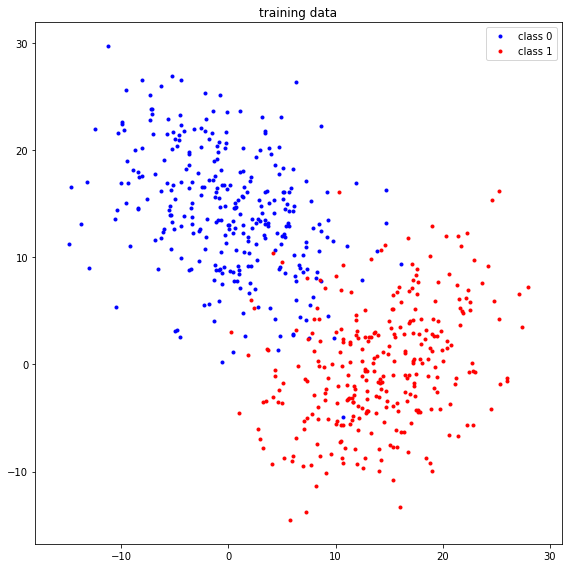

In [502]:
plot_data(point_x,point_y,label)

### # 02. plot the values of the model parameters $\theta_0$ in red curve, $\theta_1$ in green curve, and $\theta_2$ in blue curve over the gradient descent iterations

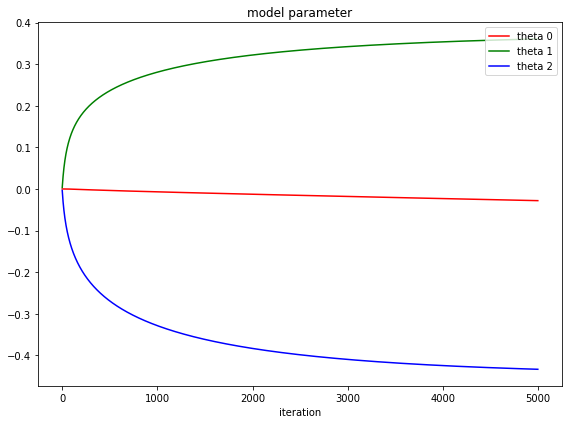

In [503]:
plot_model_parameter(theta_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

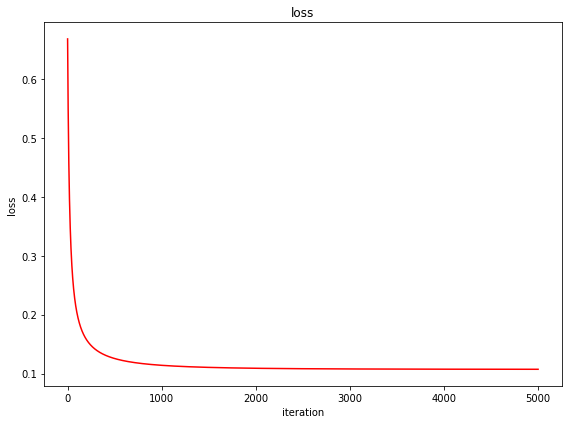

In [504]:
plot_loss_curve(loss_iteration)

### # 04. plot the classifier with the given data points superimposed

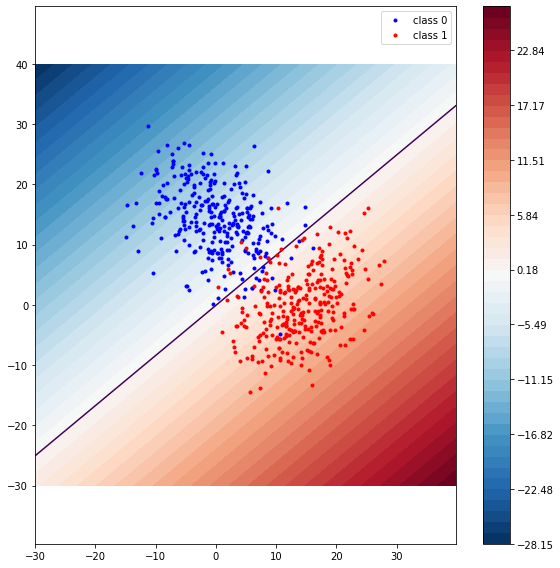

In [507]:
plot_classifier(label)